In [14]:
import wptherml
from matplotlib import pyplot as plt
import numpy as np

# dictionaries for case 1
args_1 = {
     "Number_of_Excitons": 2,
     "number_of_boson_levels": 2,
     "boson_energy_ev": 0.5 / 3.6749322175665e-2,
     "exciton_energy_ev" : 0.5 / 3.6749322175665e-2,
     "exciton_boson_coupling_ev" : 0.05 / 3.6749322175665e-2,
     "exciton_transition_dipole_magnitude_au" : 1.0,
     "exciton_ground_state_dipole_magnitude_au" : 0.0,
     "exciton_excited_state_dipole_magnitude_au" : 0.0
}

# from this paper https://journals.aps.org/prb/pdf/10.1103/PhysRevB.92.125432
qd_args = {
     "Number_of_Excitons": 2,
     "number_of_boson_levels": 2,
     "boson_energy_ev": 2.05,
     "exciton_energy_ev" : 2.05,
     "exciton_boson_coupling_ev" : 0.01,
     "boson_spontaneous_emission_rate_mev" : 0.0, #0.15e3,
     "exciton_spontaneous_emission_rate_mev" : 190e-6,
     "exciton_dephasing_rate_mev" : 2,
     "time_step_au" : 0.5
    
}

peyton_args = {
     "Number_of_Excitons": 2,
     "number_of_boson_levels": 2,
     "boson_energy_ev": 0.5 / 3.6749322175665e-2, #0375 / 3.6749322175665e-2,
     "exciton_energy_ev" : 0.5 / 3.6749322175665e-2, #0375 / 3.6749322175665e-2,
     "exciton_boson_coupling_ev" : 0.012238 / 3.6749322175665e-2,
     "boson_spontaneous_emission_rate_mev" : 0.0, #0.15e3,
     "exciton_spontaneous_emission_rate_mev" : 190e-6,
     "exciton_dephasing_rate_mev" : 2,
     "time_step_au" : 1.0
    
}

sf = wptherml.SpectrumFactory()

# instantiate cases
test_1 = sf.spectrum_factory("Spin-Boson", peyton_args)

print(test_1.energy_eigenvalues - 0.25)
RS = test_1.energy_eigenvalues[3] - test_1.energy_eigenvalues[1]
print(RS)
np.set_printoptions(precision=7)
print(np.real(test_1.energy_eigenvectors[:,2]))

Energy Eigenvalues in atomic units are
[0.25 0.73 0.75 0.77 1.23 1.25 1.27 1.75]
Energy eigenvalues in eV are
[ 6.8  19.94 20.41 20.88 33.54 34.01 34.49 47.62]
[0.   0.48 0.5  0.52 0.98 1.   1.02 1.5 ]
0.034614291152643806
[-0.         0.7071068 -0.7071068  0.         0.        -0.
 -0.        -0.       ]


In [11]:
# peyton's initial ket
peyton_ket = np.array([ 0.               +0.j, -0.816496580927726+0.j,  0.408248290463863+0.j,
  0.               +0.j, -0.408248290463863+0.j,  0.               +0.j,
  0.               +0.j,  0.               +0.j])


vecs = np.copy(test_1.energy_eigenvectors)
psi_0 = (1/3)* vecs[:, 3] +  (1/3)* vecs[:, 2] + (1/3)* vecs[:, 1]
psi_0 = vecs[:, 2]

psi_0 /= np.linalg.norm(psi_0)
#peyton_rho = np.outer(peyton_ket, peyton_ket)
#print(peyton_rho)

new_rho = np.outer(psi_0, psi_0)
print(new_rho)

test_1.exciton_dephasing_rate_au = 0.00000001
test_1.exciton_spontaneous_emission_rate_au = 0.0000005
test_1.boson_dephasing_rate_au = 0
test_1.boson_spontaneous_emission_rate_au = 0

test_1.rho = np.copy(new_rho)
print("Ket")
print(psi_0)


np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)
print(np.real(test_1.rho))

print("populations")
for i in range(8):
    print(test_1.rho[i,i])
    

[[ 0.00e+00 -0.00e+00  0.00e+00 -0.00e+00 -0.00e+00  0.00e+00  0.00e+00
   0.00e+00]
 [-0.00e+00  5.00e-01 -5.00e-01  0.00e+00  7.07e-16 -0.00e+00 -0.00e+00
  -0.00e+00]
 [ 0.00e+00 -5.00e-01  5.00e-01 -0.00e+00 -7.07e-16  0.00e+00  0.00e+00
   0.00e+00]
 [-0.00e+00  0.00e+00 -0.00e+00  0.00e+00  0.00e+00 -0.00e+00 -0.00e+00
  -0.00e+00]
 [-0.00e+00  7.07e-16 -7.07e-16  0.00e+00  9.98e-31 -0.00e+00 -0.00e+00
  -0.00e+00]
 [ 0.00e+00 -0.00e+00  0.00e+00 -0.00e+00 -0.00e+00  0.00e+00  0.00e+00
   0.00e+00]
 [ 0.00e+00 -0.00e+00  0.00e+00 -0.00e+00 -0.00e+00  0.00e+00  0.00e+00
   0.00e+00]
 [ 0.00e+00 -0.00e+00  0.00e+00 -0.00e+00 -0.00e+00  0.00e+00  0.00e+00
   0.00e+00]]
Ket
[-0.00e+00  7.07e-01 -7.07e-01  0.00e+00  9.99e-16 -0.00e+00 -0.00e+00
 -0.00e+00]
[[ 0.  -0.   0.  -0.  -0.   0.   0.   0. ]
 [-0.   0.5 -0.5  0.   0.  -0.  -0.  -0. ]
 [ 0.  -0.5  0.5 -0.  -0.   0.   0.   0. ]
 [-0.   0.  -0.   0.   0.  -0.  -0.  -0. ]
 [-0.   0.  -0.   0.   0.  -0.  -0.  -0. ]
 [ 0.  -0.   0.  

In [3]:
t = [0]
gs = []
lp = []
up = []
ds = []
gs.append(np.real(test_1.rho[0,0]))
lp.append(np.real(test_1.rho[1,1]))
ds.append(np.real(test_1.rho[2,2]))
up.append(np.real(test_1.rho[3,3]))

for i in range(16000):
    t.append(test_1.time_step_au * i)
    test_1.rk4_update_on_rho()
    gs.append(np.real(test_1.rho[0,0]))
    lp.append(np.real(test_1.rho[1,1]))
    ds.append(np.real(test_1.rho[2,2]))
    up.append(np.real(test_1.rho[3,3]))
    

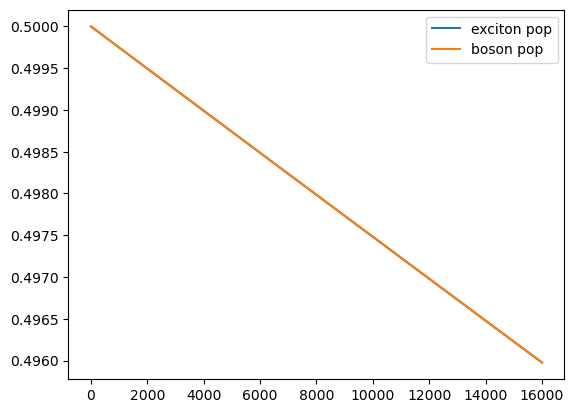

In [4]:
#plt.plot(t, gs, label="ground state")
plt.plot(t, lp, label="exciton pop")
plt.plot(t, ds, label="boson pop")
#plt.plot(t, up, label="upper polariton")
plt.legend()
plt.show()

In [5]:
for i in range(8):
    print(test_1.rho[i,i])
    
    
    


(0.007967767315248+0j)
(0.4959764170808655+0j)
(0.4959764170808643+0j)
0j
(7.939852302064638e-05+0j)
0j
0j
0j


In [2]:
test_1.build_rho_from_eigenstate(0)
print(test_1.rho)

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


In [3]:
bos_ket_0 = np.array([[1],[0],[0]])
spin_ket_1 = np.array([[0],[1]])
print(bos_ket_0)
print(spin_ket_1)
composite_ket = np.kron(bos_ket_0, spin_ket_1)

composite_bra = composite_ket.T.conj()

composite_rho = composite_ket @ composite_bra
print(composite_rho)

[[1]
 [0]
 [0]]
[[0]
 [1]]
[[0 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


Demonstrate the use on a tri-partite system
where a ground state of a N-level boson is Kroneckered into a Bell state

$$ |0\rangle \otimes |\psi\rangle = \frac{1}{\sqrt{2}} \left(|000\rangle + |011\rangle \right) $$



In [4]:

# Example usage - build rho for state 1/sqrt(2) (|00> + |11>)
# on the hilbert space of spin 1 and spin 2
ket_0s1 = np.array([[1], [0]])
ket_0s2 = np.array([[1], [0]])
ket_1s1 = np.array([[0], [1]])
ket_1s2 = np.array([[0], [1]])

# bell state
bell_ket = 1/np.sqrt(2) * (np.kron(ket_0s1, ket_0s2) + np.kron(ket_1s1, ket_1s2))
bell_bra = np.conjugate(np.transpose(bell_ket))

# build rho for Bell state
bell_rho = bell_ket @ bell_bra

print("rho_spin1_spin2")
print(bell_rho)

# ground state of 2-level harmonic oscillator
ket_0_cav = np.array([[1],[0]])
bra_0_cav = np.conjugate(np.transpose(ket_0_cav))

# build density matrix of state of cav
rho_cav = ket_0_cav @ bra_0_cav

print("rho_cav")
print(rho_cav)

# take Kronecker product of ket_0_cav with bell state
ket_psi = np.kron(ket_0_cav, bell_ket)

# get bra of this composite state
bra_psi = np.conjugate(np.transpose(ket_psi))

# build rho for composite state
rho_psi = ket_psi @ bra_psi
print("rho_cav_spin1_spin2")
print(rho_psi)

rho_spin1_spin2
[[0.5 0.  0.  0.5]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.5 0.  0.  0.5]]
rho_cav
[[1 0]
 [0 0]]
rho_cav_spin1_spin2
[[0.5 0.  0.  0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.5 0.  0.  0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]]


In [7]:
# test out the method to build a density matrix from a given ket
test_1.build_rho_from_ket(ket_psi)
print("Rho attribute")
print(test_1.rho)

print(test_1.number_of_excitons)
print(test_1.boson_basis)
print(test_1.single_exciton_basis)

# take partial traces
test_1.compute_partial_traces(test_1.rho)

print("RDM Spin1 Spin1")
print(test_1.rdm_spin1_spin2)

print("RDM Cavity Spin1")
print(test_1.rdm_cavity_spin1)

print("RDM Cavity Spin2")
print(test_1.rdm_cavity_spin2)

Rho attribute
[[0.5 0.  0.  0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.5 0.  0.  0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]]
2
[[1. 0.]
 [0. 1.]]
[[1 0]
 [0 1]]
Rows and Cols of A, B, C
2 2
2 2
2 2
RDM Spin1 Spin1
[[0.5 0.  0.  0.5]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.5 0.  0.  0.5]]
RDM Cavity Spin1
[[0.5 0.  0.  0. ]
 [0.  0.5 0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]]
RDM Cavity Spin2
[[0.5 0.  0.  0. ]
 [0.  0.5 0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]]


In [ ]:
#test_1.build_rho_from_eigenstate(1)
test_1.rho = np.copy(composite_rho)
t = [0]
gs = []
lp = []
up = []
ds = []
gs.append(np.real(test_1.rho[0,0]))
lp.append(np.real(test_1.rho[1,1]))
ds.append(np.real(test_1.rho[2,2]))
up.append(np.real(test_1.rho[3,3]))

for i in range(16000 * 2):
    t.append(test_1.time_step_au * i)
    test_1.rk4_update_on_rho()
    gs.append(np.real(test_1.rho[0,0]))
    lp.append(np.real(test_1.rho[1,1]))
    ds.append(np.real(test_1.rho[2,2]))
    up.append(np.real(test_1.rho[3,3]))
    


In [ ]:
plt.plot(t, gs, label="ground state")
plt.plot(t, lp, label="exciton pop")
plt.plot(t, ds, label="boson pop")
#plt.plot(t, up, label="upper polariton")
plt.legend()
plt.show()